In [1]:
# Imports
from annotation_targets import Annotater
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib
from IPython.display import clear_output

In [2]:

posture_images_annotator = Annotater(os.path.join(os.getcwd(), 'data', 'raw_images', 'archive', 'images', 'train'))

In [3]:
posture_images_annotator.rename_images()

Image annotated
{'Image_0.jpg': [-1, 0, 0, 1, 1], 'Image_1.jpg': [-1, -1, 0, 1, 0]}
None


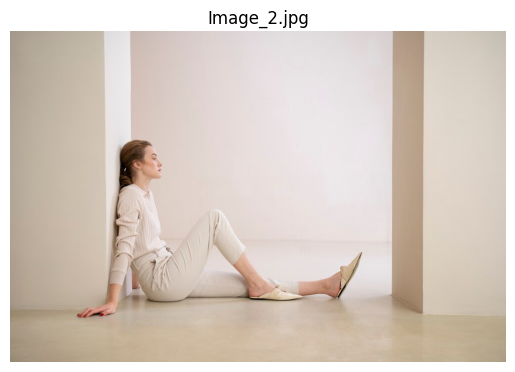

In [4]:
posture_images_annotator.annotate_images()

In [5]:
posture_images_annotator.save_annotated_images()

  image_filename  Head  Neck  Shoulder  Thoraric_Spine  Lumbar_Spine
0    Image_0.jpg    -1     0         0               1             1
1    Image_1.jpg    -1    -1         0               1             0
2    Image_2.jpg    -1     1         0               1             1


Pose landmarks detected.


I0000 00:00:1748101179.959460   75989 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1748101180.047436   77638 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 550.144.03), renderer: NVIDIA GeForce RTX 3060/PCIe/SSE2
W0000 00:00:1748101180.093932   77632 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1748101180.126089   77624 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


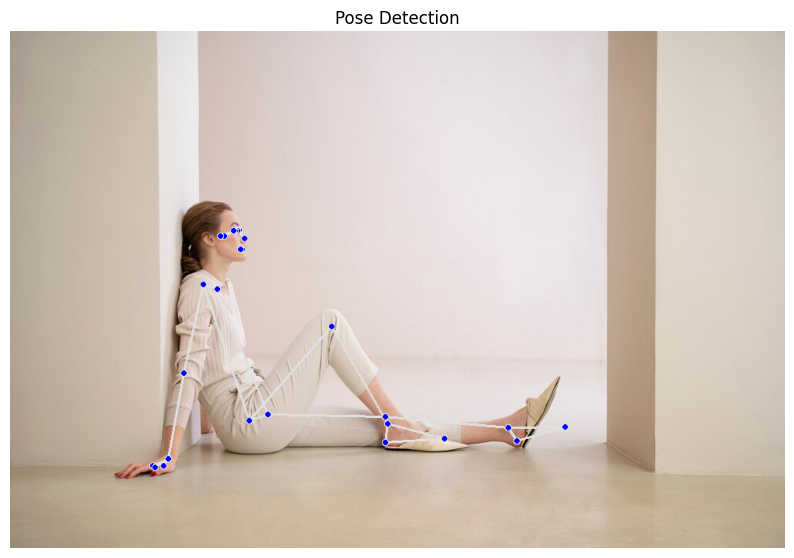

In [3]:
import mediapipe as mp
import cv2
import os
import matplotlib.pyplot as plt

mp_pose = mp.solutions.pose #accesses pose solution inside Mediapipe
pose = mp_pose.Pose(min_detection_confidence = 0.5, min_tracking_confidence=0.5) #create instance of pose class

mp_drawing = mp.solutions.drawing_utils

image_path = os.path.join(os.getcwd(), 'data', 'raw_images', 'archive', 'images', 'train', 'Image_2.jpg')
image = cv2.imread(image_path)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

results = pose.process(image_rgb)
output = image_rgb.copy()

if results.pose_landmarks:
    mp_drawing.draw_landmarks(output, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
    print("Pose landmarks detected.")
else:
    print("No pose landmarks detected.")

plt.figure(figsize=(10, 10))  # You can adjust the size
plt.imshow(output)
plt.axis('off')  # Hide axis
plt.title("Pose Detection")
plt.show()